# Projet Credit card_ Fraud

Les jeux de données contiennent des transactions effectuées par carte de crédit en septembre 2013 par des titulaires de carte européens. Cet ensemble de données présente les transactions qui ont eu lieu en deux jours, où nous avons 492 fraudes sur 284 807 transactions. L'ensemble de données est très déséquilibré, la classe positive (fraudes) représente 0,172% de toutes les transactions.

Il ne contient que des variables d'entrée numériques qui sont le résultat d'une transformation PCA. Malheureusement, en raison de problèmes de confidentialité, nous ne pouvons pas fournir les fonctionnalités d'origine et plus d'informations sur les données. Les fonctionnalités V1, V2, ... V28 sont les principaux composants obtenus avec PCA, les seules fonctionnalités qui n'ont pas été transformées avec PCA sont 'Time' et 'Amount'. La fonction «Time» contient les secondes écoulées entre chaque transaction et la première transaction de l'ensemble de données. La fonctionnalité «Montant» est le montant de la transaction, cette fonctionnalité peut être utilisée pour un apprentissage sensible au coût dépendant de l'exemple. La fonction 'Classe' est la variable de réponse et prend la valeur 1 en cas de fraude et 0 sinon.

http://www.jmlr.org/papers/volume15/oentaryo14a/oentaryo14a.pdf

https://medium.com/@bluedme_tech/comment-traiter-les-probl%C3%A8mes-de-classification-d%C3%A9s%C3%A9quilibr%C3%A9e-en-machine-learning-8c3bc95ca25b

https://gist.github.com/ryllada/1a83bd49cb025f24b0cdcbb4a0601c81

https://chrisalbon.com/machine_learning/trees_and_forests/handle_imbalanced_classes_in_random_forests/

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

In [2]:
df= pd.read_csv('./données/creditcard.csv')

In [3]:
df.shape
#284807 individus 
#31 variable

(284807, 31)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
col=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
df[col]=df[col].astype('float16')
df['Class']=df['Class'].astype('int8')

In [6]:
df.dtypes

Time      float64
V1        float16
V2        float16
V3        float16
V4        float16
V5        float16
V6        float16
V7        float16
V8        float16
V9        float16
V10       float16
V11       float16
V12       float16
V13       float16
V14       float16
V15       float16
V16       float16
V17       float16
V18       float16
V19       float16
V20       float16
V21       float16
V22       float16
V23       float16
V24       float16
V25       float16
V26       float16
V27       float16
V28       float16
Amount    float16
Class        int8
dtype: object

* TimeNumber de secondes écoulées entre cette transaction et la première transaction dans l'ensemble de données
* V1 peut être le résultat d'une réduction de dimensionnalité PCA pour protéger les identités des utilisateurs et les fonctionnalités sensibles (v1-v28)
* montant: montant de la transaction
* classe binaire

In [ ]:
df['Class'].value_counts()

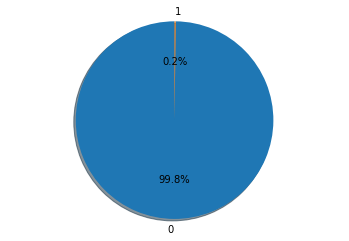

In [11]:
t=df['Class'].value_counts()
ind=t.index
t=t.reset_index(drop=True)
fig1, ax1 = plt.subplots()
ax1.pie(t, labels=ind, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

Nous constatons que les montants de la transaction dont il n'y pas de fraude sont élevés  

Text(0, 0.5, 'amount')

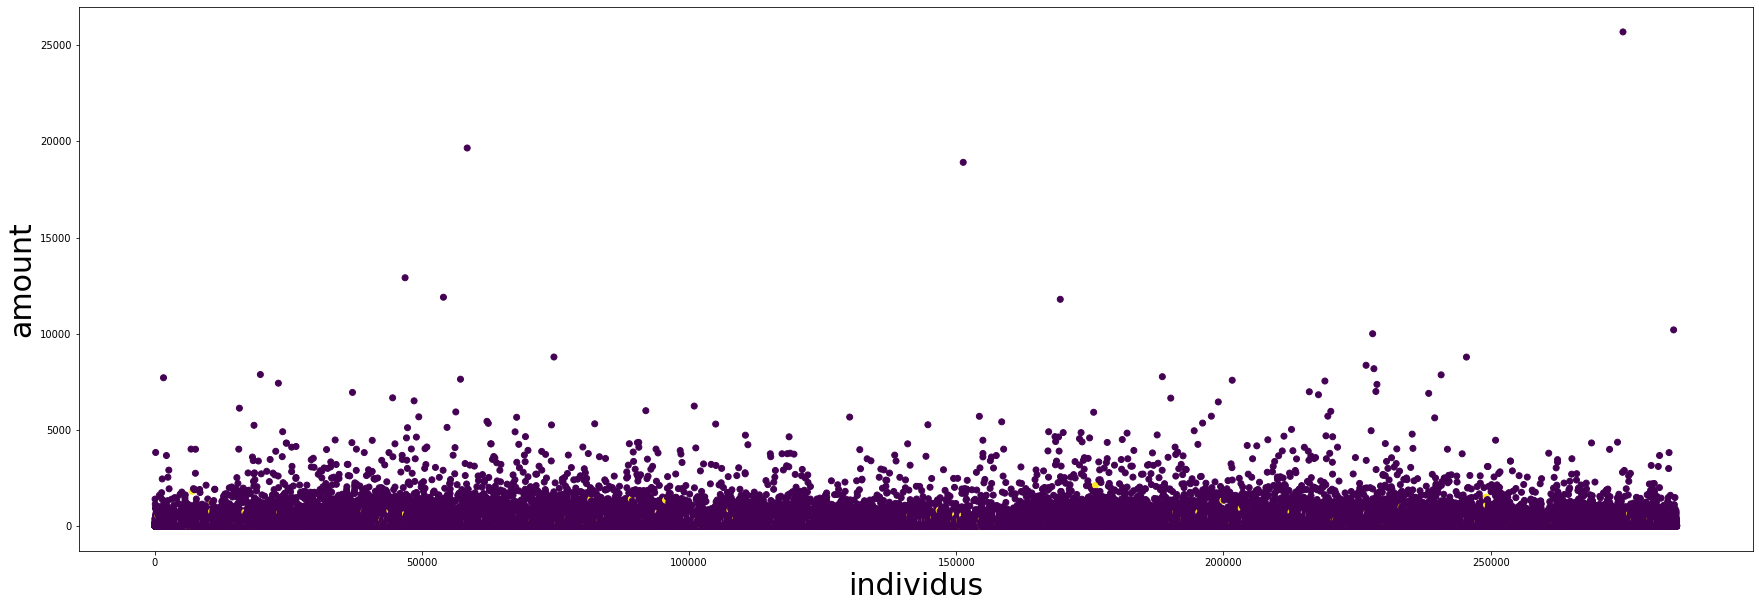

In [160]:
plt.figure(figsize=(30,10))
plt.scatter(df.index,df['Amount'],c=df['Class'])
plt.xlabel('individus' ,fontsize=30)
plt.ylabel('amount', fontsize=30)

 cette 2eme figure montre la categorie des montants qui presentent les transactions frauduleuses par carte de crédit dont nous remarquons que les pirates utilisent surtout des bas montants pour ne pas attirer l'attention de propriétaire de carte   

Text(0, 0.5, 'amount')

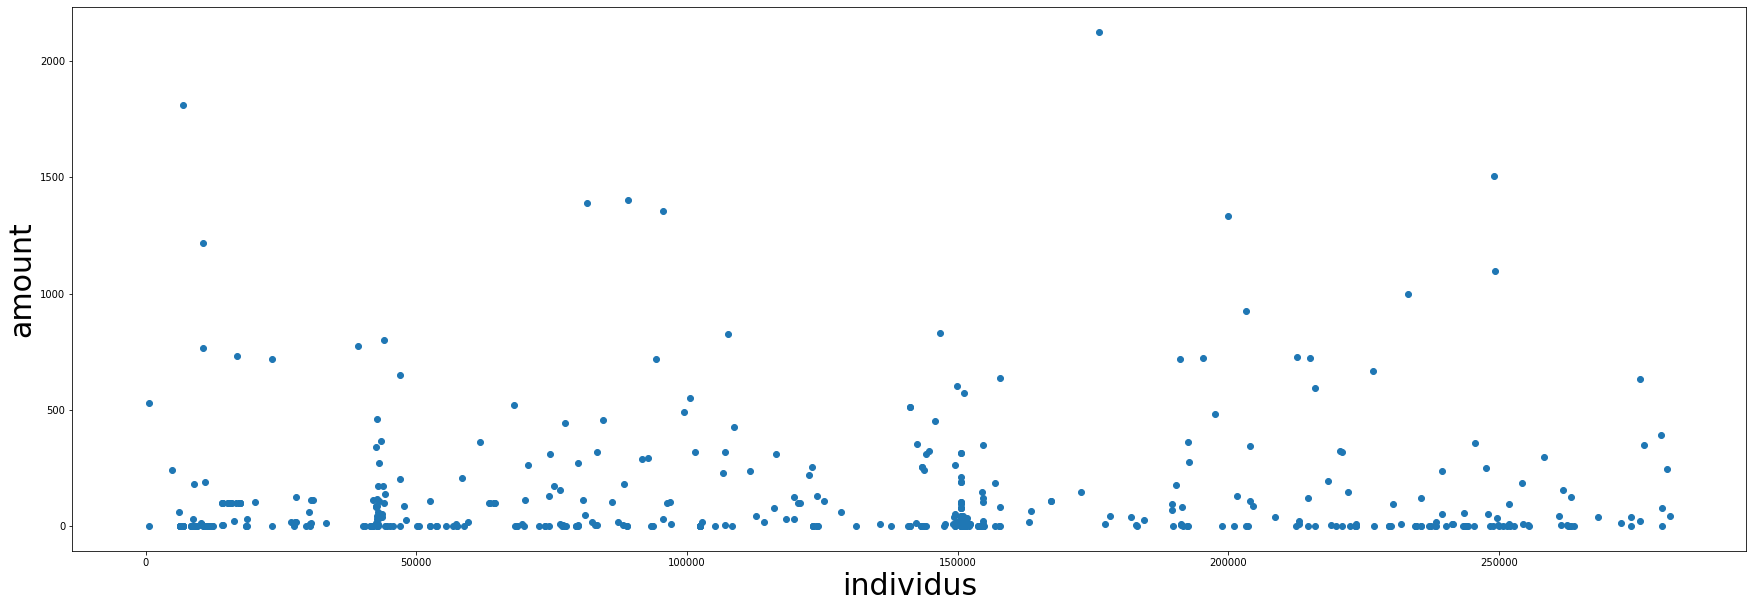

In [140]:
plt.figure(figsize=(30,10))
plt.scatter(df[df['Class']==1].index,df[df['Class']==1]['Amount'])
plt.xlabel('individus' ,fontsize=30)
plt.ylabel('amount', fontsize=30)

la distribution des variables des composantes principales 

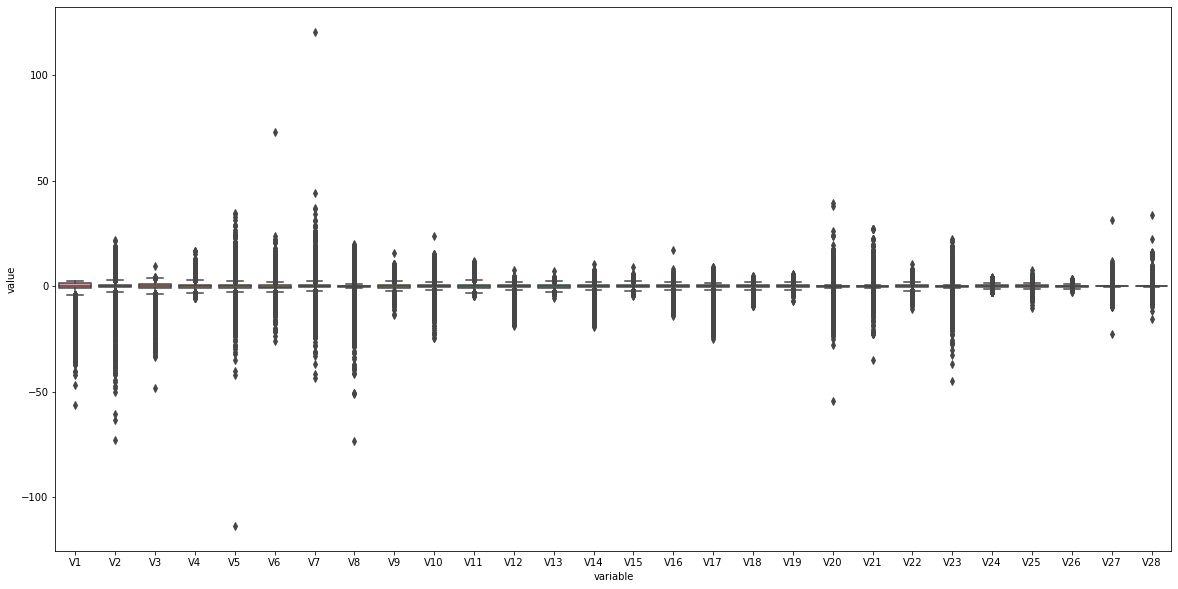

In [89]:
plt.figure(figsize=(20,10))
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,1:29]))
plt.show()

3D projection des 3 premier composantes principales par rapport au 2 classes  

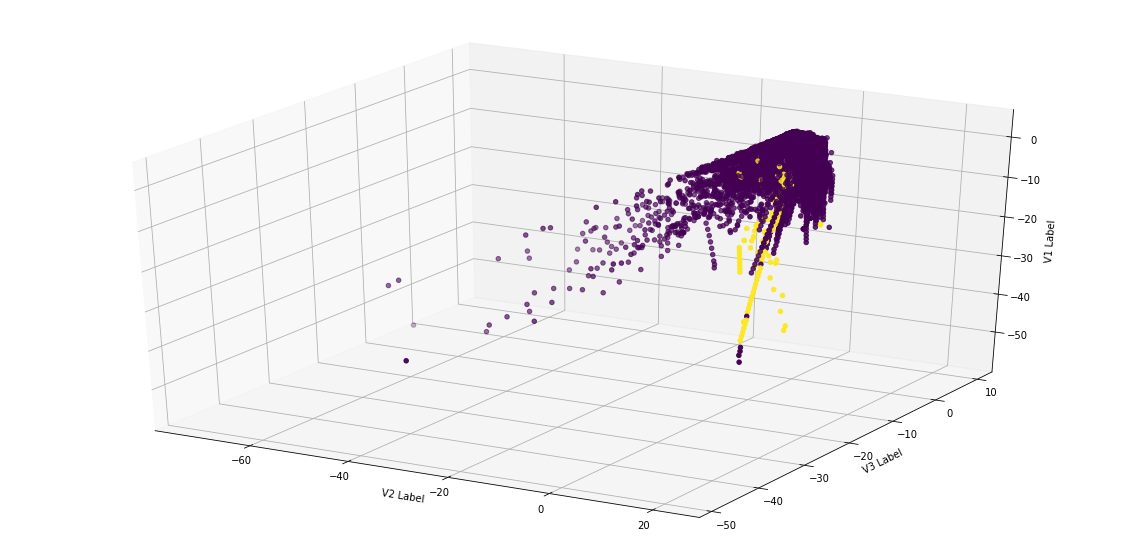

In [87]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( df['V2'],df['V3'],df['V1'], c=df['Class'], marker='o')
ax.set_xlabel('V2 Label')
ax.set_ylabel('V3 Label')
ax.set_zlabel('V1 Label')
plt.show()

la projection des 2 premier composantes par rapport au temps 

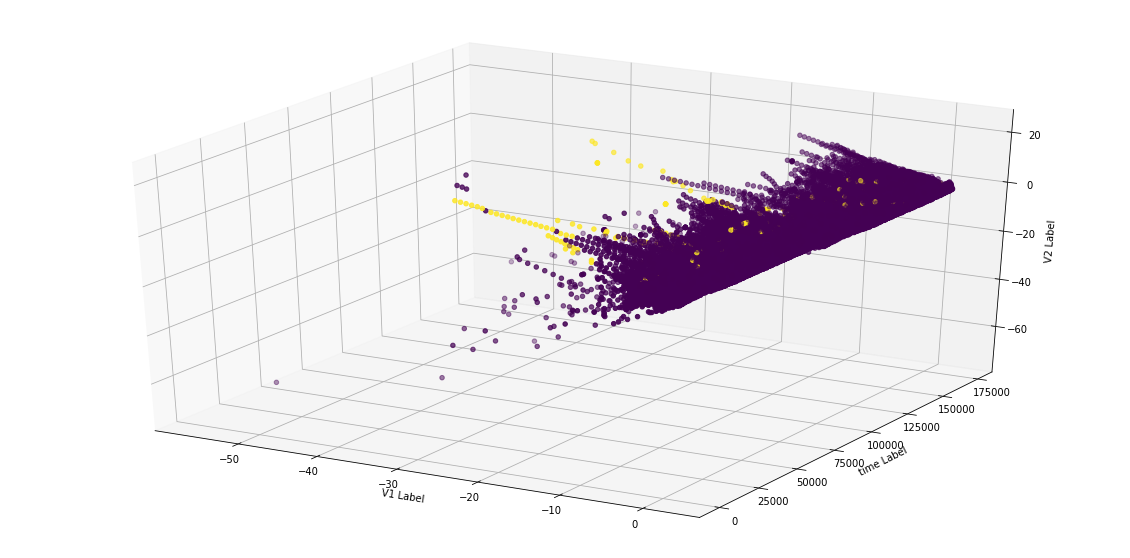

In [88]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( df['V1'], df['Time'],df['V2'], c=df['Class'], marker='o')
ax.set_xlabel('V1 Label')
ax.set_ylabel('time Label')
ax.set_zlabel('V2 Label')
plt.show()

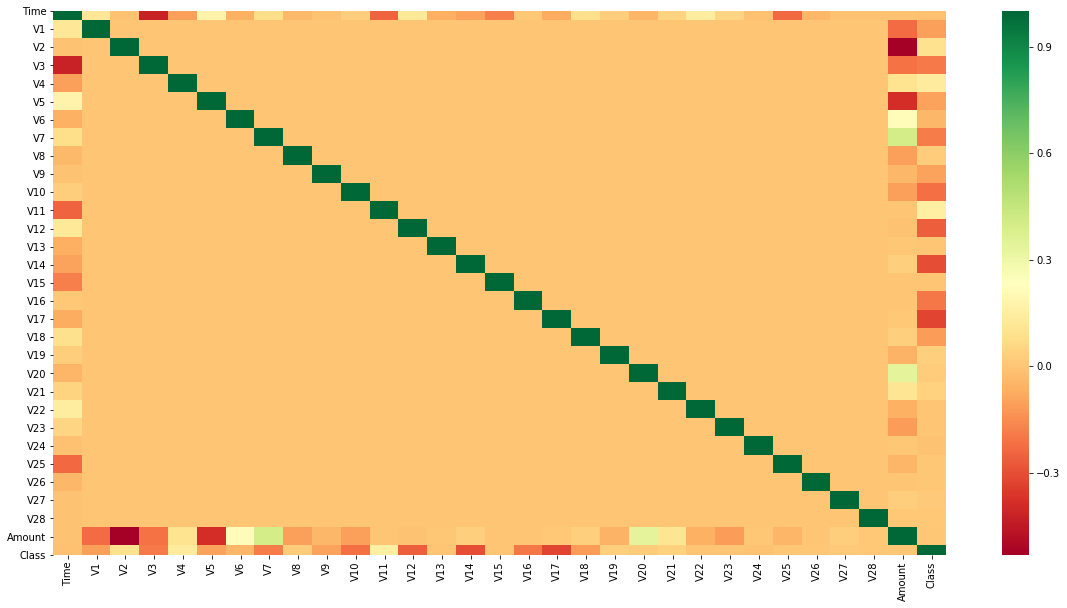

In [74]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='RdYlGn')
fig=plt.gcf()
plt.show()

# équilibrer les données 

pour le cas des algorithmes qui ne peut pas ajuster les poids pour traiter les données non équilibrer

In [7]:
from imblearn.over_sampling import ADASYN
import matplotlib.image as mpimg 

Using TensorFlow backend.


nous avons appliquer l'algorithme **ADASYN** est une version améliorée de **SMOTE** sous le principe de Oversampling en rajoutant des nouvelles données dans la classe **minoritaire**. qui se base sur la distribution des données pour déterminer le nombre de points générés pour chaque observation. Il rend ainsi la distribution beaucoup moins inégale. SMOTE quant à lui génère toujours le même nombre de points quel que soit l’observation.comme il montre la figure suivantes

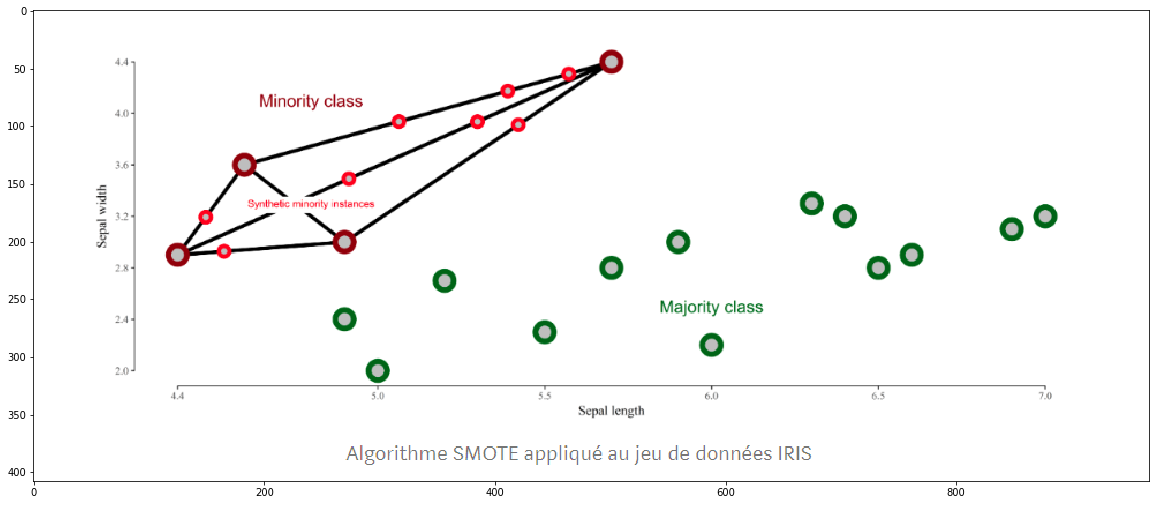

In [34]:
img = mpimg.imread('smoke.png') 
plt.figure(figsize=(20,10))
plt.imshow(img)

In [45]:
AD = ADASYN (random_state=0)
X_ad, Y_ad = AD.fit_resample(df.iloc[:,1:30], df['Class'])

In [46]:
data=pd.DataFrame(X_ad)   
data.columns=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [47]:
data['Class']=Y_ad

In [11]:
data.shape

(568555, 30)

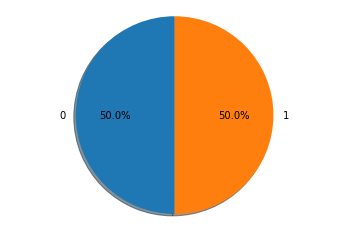

In [43]:
t1=data['Class'].value_counts()
ind1=t1.index
t1=t1.reset_index(drop=True)
fig1, ax1 = plt.subplots()
ax1.pie(t1, labels=ind1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

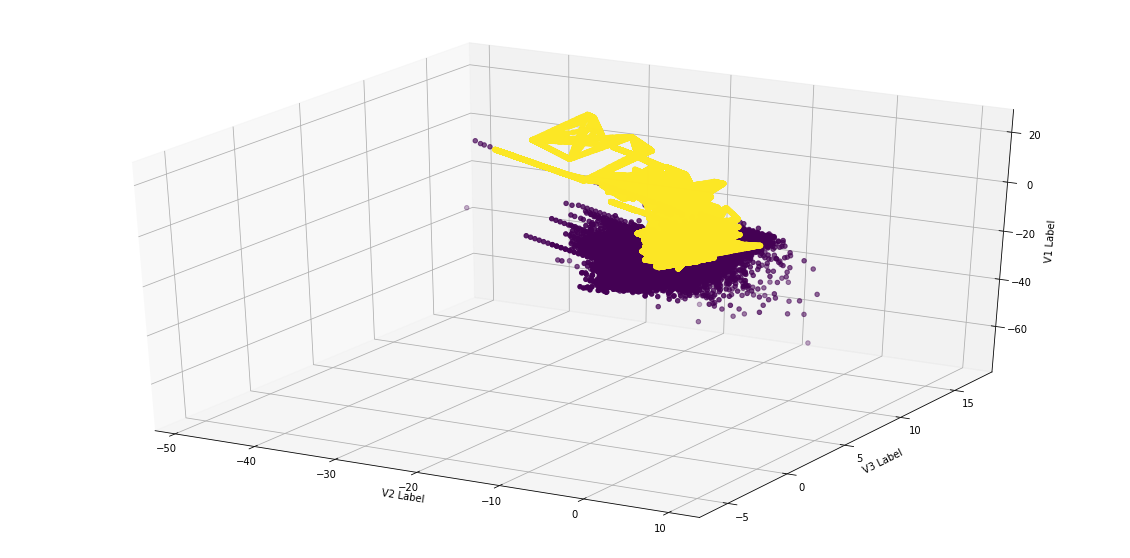

In [21]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( data['V2'],data['V3'],data['V1'], c=data['Class'], marker='o')
ax.set_xlabel('V2 Label')
ax.set_ylabel('V3 Label')
ax.set_zlabel('V1 Label')
plt.show()

#  Selection des variables + Application des algorithmes avec les données équilibré  

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report)

In [48]:
train_X, test_X, train_Y, test_Y = train_test_split(data.iloc[:,0:29], data['Class'], test_size=0.30,random_state=0)

In [24]:
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(train_X,train_Y )
predictionRF=modelRF.predict(test_X)

In [25]:
l=pd.Series(modelRF.feature_importances_,index=train_X.columns).sort_values(ascending=False)

les variables les plus pertinents pour les données équilibrer

In [17]:
#les variables a garder 
l[:-10].index

Index(['V14', 'V4', 'V10', 'V12', 'V17', 'V11', 'Amount', 'V3', 'V8', 'V16',
       'V2', 'V9', 'V1', 'V7', 'V21', 'V5', 'V19', 'V18', 'V20'],
      dtype='object')

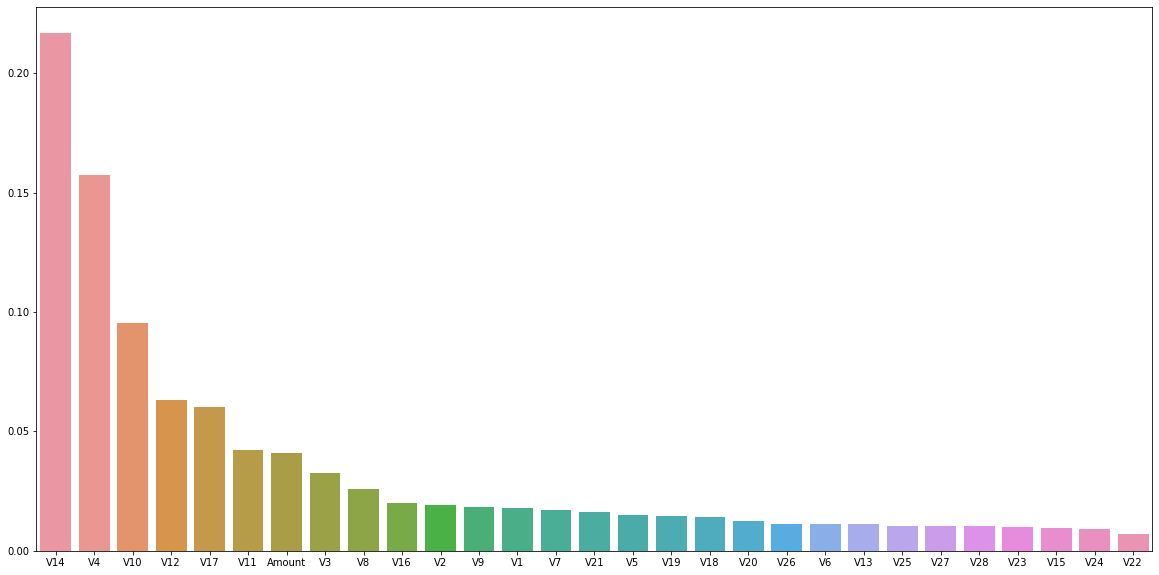

In [18]:
fig = plt.figure(figsize=(20,10))
sns.barplot(l.index,l.values)

In [26]:
train_X=train_X.loc[:,l[:-10].index].reset_index(drop=True)
test_X=test_X.loc[:,l[:-10].index].reset_index(drop=True)

In [49]:
col=['V14', 'V4', 'V10', 'V12', 'V17', 'V11', 'Amount', 'V3', 'V8', 'V16',
       'V2', 'V9', 'V1', 'V7', 'V21', 'V5', 'V19', 'V18', 'V20']
train_X=train_X[col]
test_X=test_X[col]

In [50]:
print(test_X.shape,train_X.shape)

(170567, 19) (397988, 19)


Pour ce fait nous devons choisir les meilleurs parametre pour chaque algorithmes avec GridsearchCV et la validation Croisé pour mieux performer le modèle et pour l'evalution nous allons utiliser la courbe de ROC pour comparaire les resultats obtenus par chaque algorithme

In [89]:
lg = LogisticRegression()
penalisation = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalisation)

In [36]:
skf = StratifiedKFold(n_splits=5)
clf = GridSearchCV(lg, hyperparameters, cv=skf)

In [91]:
best_model = GridSearchCV(estimator=clf, param_gridhyperparameters , cv=skf)
best_model.fit(train_X,train_Y)

In [31]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 10000.0


In [92]:
y_pred_prob_lr = best_model.predict_proba(test_X)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_Y, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(test_Y, y_pred_prob_lr)

In [83]:
NB=GaussianNB()
NB.fit(train_X.values,train_Y.values)

C:\Users\majda\Anaconda3\lib\site-packages\numpy\core\_methods.py:107: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
C:\Users\majda\Anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


GaussianNB(priors=None, var_smoothing=1e-09)

In [84]:
y_pred_prob_nb = NB.predict_proba(test_X.values)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(test_Y, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(test_Y, y_pred_prob_nb)

C:\Users\majda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:98: RuntimeWarning: invalid value encountered in subtract
  return jll - np.atleast_2d(log_prob_x).T


In [93]:
lda = LDA(n_components=None)
X_lda = lda.fit(train_X,train_Y)

In [94]:
y_pred_prob_lda = X_lda.predict_proba(test_X)[:,1]
fpr_lda, tpr_lda, thresholds_lda= roc_curve(test_Y, y_pred_prob_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)
precision_lda, recall_lda, th_lda = precision_recall_curve(test_Y, y_pred_prob_lda)

In [102]:
col=['V14', 'V4', 'V10', 'V12', 'V17', 'V11', 'Amount', 'V3', 'V8', 'V16',
       'V2', 'V9', 'V1', 'V7', 'V21', 'V5', 'V19', 'V18', 'V20']
train_X[col]=train_X[col].astype('float64')
test_X[col]=test_X[col].astype('float64')

In [103]:
qda = QDA()
X_qda = qda.fit(train_X,train_Y)
y_pred_prob_qda = X_qda.predict_proba(test_X)[:,1]
fpr_qda, tpr_qda, thresholds_qda= roc_curve(test_Y, y_pred_prob_qda)
roc_auc_qda = auc(fpr_qda, tpr_qda)
precision_qda, recall_qda, th_qda = precision_recall_curve(test_Y, y_pred_prob_qda)

In [19]:
param_ln=[{'C': [1, 10, 100], 'kernel': ['linear'],'gamma': [0.001, 0.0001]}]
param_rbf=[{ 'kernel': ['rbf'],'C': [1, 10, 100], 'gamma': [0.001, 0.0001]}]    

In [ ]:
skf = StratifiedKFold(n_splits=5)
svm_LN = GridSearchCV(estimator=svm.SVC(), param_grid=param_ln, cv=skf)
svm_LN.fit(train_X,train_Y)

In [21]:
svm_LN=svm.SVC(C=1,kernel='linear',gamma=0.01,probability=True)
svm_LN.fit(train_X,train_Y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [23]:
y_pred_prob_svmLN = svm_LN.predict_proba(test_X)[:,1]
fpr_svmLN, tpr_svmLN, thresholds_svmLN= roc_curve(test_Y, y_pred_prob_svmLN)
roc_auc_svmLN = auc(fpr_svmLN, tpr_svmLN)
precision_svmLN, recall_svmLN, th_svmLN = precision_recall_curve(test_Y, y_pred_prob_svmLN)

In [ ]:
skf = StratifiedKFold(n_splits=5)
svm_rbf = GridSearchCV(estimator=svm.SVC(), param_grid=param_rbf, cv=skf)
svm_rbf.fit(train_X,train_Y)

In [ ]:
print('Best C:',svm_rbf.best_estimator_.C) 
print('Best Gamma:',svm_rbf.best_estimator_.gamma)

In [26]:
svm_rbf=svm.SVC(C=1,kernel='rbf',gamma=0.001,probability=True)
svm_rbf.fit(train_X,train_Y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [27]:
y_pred_prob_svmrbf = svm_rbf.predict_proba(test_X)[:,1]
fpr_svmrbf, tpr_svmrbf, thresholds_svmrbf= roc_curve(test_Y, y_pred_prob_svmrbf)
roc_auc_svmrbf = auc(fpr_svmrbf, tpr_svmrbf)
precision_svmrbf, recall_svmrbf, th_svmrbf = precision_recall_curve(test_Y, y_pred_prob_svmrbf)

In [29]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[2,4,5,6,7,8,9,10,11,12,15,20]}
skf = StratifiedKFold(n_splits=5)
tree = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=skf)
tree.fit(train_X,train_Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
     

In [32]:
y_pred_prob_tree = tree.predict_proba(test_X)[:,1]
fpr_tree, tpr_tree, thresholds_tree= roc_curve(test_Y, y_pred_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)
precision_tree, recall_tree, th_tree = precision_recall_curve(test_Y, y_pred_prob_tree)

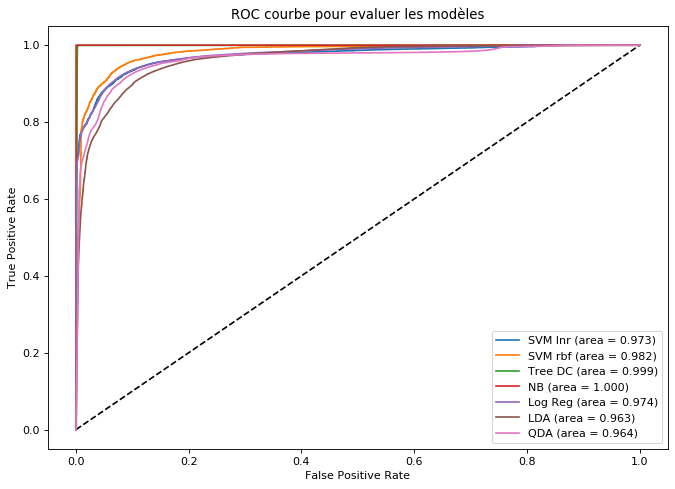

In [104]:
plt.figure(figsize=(10,7), dpi=80)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_svmLN, tpr_svmLN, label='SVM lnr (area = %0.3f)' % roc_auc_svmLN)
plt.plot(fpr_svmrbf, tpr_svmrbf, label='SVM rbf (area = %0.3f)' % roc_auc_svmrbf)
plt.plot(fpr_tree, tpr_tree, label='Tree DC (area = %0.3f)' % roc_auc_tree)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_lda, tpr_lda, label='LDA (area = %0.3f)' % roc_auc_lda)
plt.plot(fpr_qda, tpr_qda, label='QDA (area = %0.3f)' % roc_auc_qda)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC courbe pour evaluer les modèles')
plt.legend(loc='best')
plt.show()

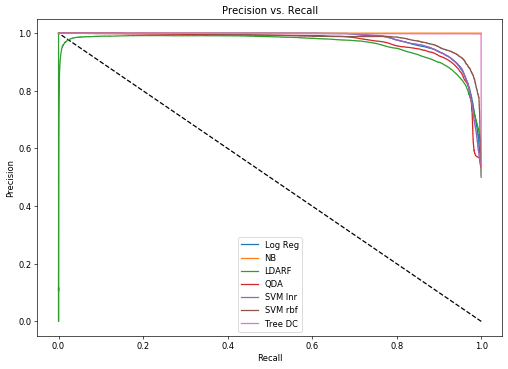

In [105]:
plt.figure(figsize=(10,7), dpi=60)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_nb, precision_nb, label='NB')
plt.plot(recall_lda, precision_lda, label='LDARF')
plt.plot(recall_qda, precision_qda, label='QDA')
plt.plot(recall_svmLN, precision_svmLN, label='SVM lnr')
plt.plot(recall_svmrbf, precision_svmrbf, label='SVM rbf')
plt.plot(recall_tree, precision_tree, label='Tree DC')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

#  Selection des variables + Application des algorithmes avec les données non équilibré  

In [149]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import confusion_matrix,classification_report

In [109]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(df.iloc[:,1:30], df['Class'], test_size=0.30,random_state=0)

In [110]:
modelRF= RandomForestClassifier(n_estimators=100,random_state=0, class_weight="balanced")
modelRF.fit(Train_X,Train_Y )
predictionRF=modelRF.predict(Test_X)

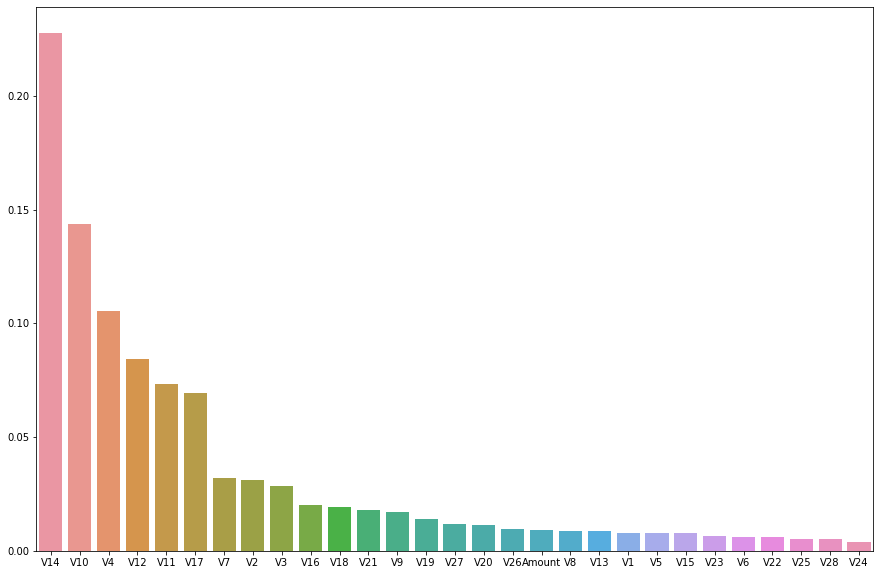

In [111]:
k=pd.Series(modelRF.feature_importances_,index=Train_X.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(15,10))
sns.barplot(k.index,k.values)

In [113]:
k=pd.Series(modelRF.feature_importances_,index=Train_X.columns).sort_values(ascending=False)
Train_X=Train_X.loc[:,k[:-10].index].reset_index(drop=True)
Test_X=Test_X.loc[:,k[:-10].index].reset_index(drop=True)

In [115]:
col=['V14', 'V10', 'V4', 'V12', 'V11', 'V17', 'V7', 'V2', 'V3', 'V16', 'V18',
       'V21', 'V9', 'V19', 'V27', 'V20', 'V26', 'Amount', 'V8']

In [136]:
parameters = {'n_estimators':[500, 1000, 1500], 
              'learning_rate':[0.01, 0.03, 0.05],
              'max_depth':[5,10,15],
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[3,5,7]}
skf = StratifiedKFold(n_splits=5)
clf=GradientBoostingClassifier(random_state=42)
gbc = GridSearchCV (clf, parameters,cv=skf)
gbc.fit(Train_X, Train_Y)

In [147]:
y_pred_prob_gbc = gbc.predict_proba(Test_X)[:,1]
fpr_gbc, tpr_gbc, thresholds_gbc= roc_curve(Test_Y, y_pred_prob_gbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)
precision_gbc, recall_gbc, th_gbc = precision_recall_curve(Test_Y, y_pred_prob_gbc)

In [151]:
y_pred_prob_gbc = gbc.predict(Test_X)
confusion_matrix(Test_Y, y_pred_prob_gbc)

array([[85280,    16],
       [   56,    91]], dtype=int64)

In [153]:
tb=classification_report(Test_Y, y_pred_prob_gbc)

In [154]:
print(tb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.85      0.62      0.72       147

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [158]:
parameters = {'n_estimators':[500, 1000, 1500], 
              'learning_rate':[0.01, 0.03, 0.05]}
skf = StratifiedKFold(n_splits=5)
clf=AdaBoostClassifier(random_state=42)
ADB = GridSearchCV (clf, parameters,cv=skf)
ADB.fit(Train_X, Train_Y)

In [179]:
y_pred_prob_adb = ADB.predict_proba(Test_X)[:,1]
fpr_adb, tpr_adb, thresholds_adb= roc_curve(Test_Y, y_pred_prob_adb)
roc_auc_adb = auc(fpr_adb, tpr_adb)
precision_adb, recall_adb, th_adb = precision_recall_curve(Test_Y, y_pred_prob_adb)

In [162]:
y_pred_prob_adb = ADB.predict(Test_X)
confusion_matrix(Test_Y, y_pred_prob_adb)

array([[85278,    18],
       [   50,    97]], dtype=int64)

In [163]:
print(classification_report(Test_Y, y_pred_prob_adb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.84      0.66      0.74       147

    accuracy                           1.00     85443
   macro avg       0.92      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [167]:
ExtraTreesClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [170]:
Train_Y.value_counts()

0    199019
1       345
Name: Class, dtype: int64

In [172]:
parameters = {'n_estimators':[500, 1000, 1500], 
              'max_depth':[5,10,30]
              'learning_rate':[0.01, 0.03, 0.05]}
skf = StratifiedKFold(n_splits=5)
clf=ExtraTreesClassifier(random_state=42,class_weight={0:100.,1:1.})
ETC= GridSearchCV (clf, parameters,cv=skf)
ETC.fit(Train_X, Train_Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight={0: 100.0, 1: 1.0}, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)

In [180]:
y_pred_prob_etc = ETC.predict_proba(Test_X)[:,1]
fpr_etc, tpr_etc, thresholds_etc= roc_curve(Test_Y, y_pred_prob_etc)
roc_auc_etc = auc(fpr_etc, tpr_etc)
precision_etc, recall_etc, th_etc = precision_recall_curve(Test_Y, y_pred_prob_etc)

In [181]:
y_pred_prob_etc = ETC.predict(Test_X)
confusion_matrix(Test_Y, y_pred_prob_etc)

array([[85290,     6],
       [   35,   112]], dtype=int64)

In [182]:
print(classification_report(Test_Y, y_pred_prob_etc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [221]:
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 576,
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.07,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'num_class' : 1,
          'metric' : 'binary_error'
          }
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])
skf = StratifiedKFold(n_splits=5)
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=skf, n_jobs=-1)
grid.fit(Train_X, Train_Y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_bin=512,
                                      max_depth=-1, min_child_samples=5,
                                      min_child_weight=1, min_split_gain=0.5,
                                      n_estimators=100, n_jobs=5, num_leaves=31,
                                      objectiv...y', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      scale_pos_weight=576, silent=True,
                                      subsample=1, subsample_for_bin=200,
                                      subsample_freq=1),
             iid='deprecated', n_jobs=-1,


In [252]:
y_pred_prob_lgbm = grid.predict_proba(Test_X)[:,1]
fpr_lgbm, tpr_lgbm, thresholds_lgbm= roc_curve(Test_Y, y_pred_prob_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
precision_lgbm, recall_lgbm, th_lgbm = precision_recall_curve(Test_Y, y_pred_prob_lgbm)

In [253]:
y_pred_prob_lgbm = grid.predict(Test_X)
confusion_matrix(Test_Y, y_pred_prob_lgbm)

array([[83408,  1888],
       [   24,   123]], dtype=int64)

In [254]:
print(classification_report(Test_Y, y_pred_prob_lgbm))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.84      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [239]:
help(xgb.XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of trees to fit.
 |  verbosity : int
 |      The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |  silent : boolean
 |      Whether to print messages while running boosting. Deprecat

In [238]:
xgb.XGBClassifier().get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

In [219]:
Train_Y.value_counts()

0    199019
1       345
Name: Class, dtype: int64

In [220]:
199019 / 345
#

576.8666666666667

In [247]:
clf = xgb.XGBClassifier()
parameters = {
    'n_estimators': [100, 250, 500],
    'nthread': [5,4],
    'max_depth': [3, 9, 12],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
    'scale_pos_weight':[ 576]
}
skf = StratifiedKFold(n_splits=6)
grid = GridSearchCV(clf, parameters, verbose=2, n_jobs=-1,cv=skf)

grid.fit(Train_X, Train_Y)

Fitting 6 folds for each of 72 candidates, totalling 432 fits


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=576, seed=None,
              silent=None, subsample=1, verbosity=1)

In [248]:
y_pred_prob_xgb = grid.predict_proba(Test_X)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb= roc_curve(Test_Y, y_pred_prob_xgb)
roc_auc_xgb= auc(fpr_xgb, tpr_xgb)
precision_xgb, recall_xgb, th_xgb = precision_recall_curve(Test_Y, y_pred_prob_xgb)

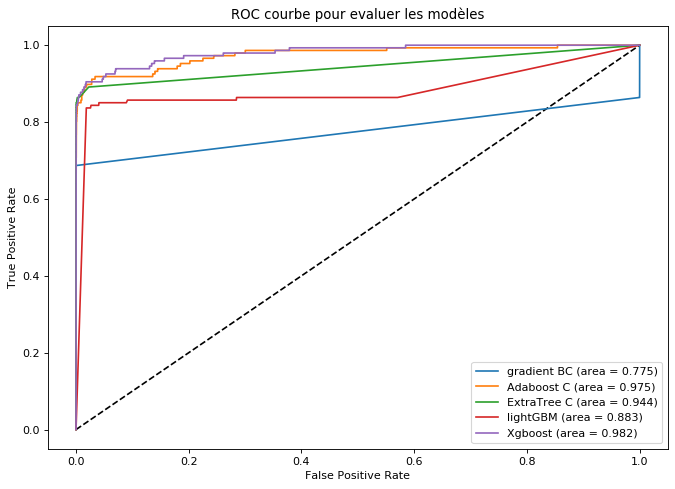

In [255]:
plt.figure(figsize=(10,7), dpi=80)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gbc, tpr_gbc, label='gradient BC (area = %0.3f)' % roc_auc_gbc)
plt.plot(fpr_adb, tpr_adb, label='Adaboost C (area = %0.3f)' % roc_auc_adb)
plt.plot(fpr_etc, tpr_etc, label='ExtraTree C (area = %0.3f)' % roc_auc_etc)
plt.plot(fpr_lgbm, tpr_lgbm, label='lightGBM (area = %0.3f)' % roc_auc_lgbm)
plt.plot(fpr_xgb, tpr_xgb, label='Xgboost (area = %0.3f)' % roc_auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC courbe pour evaluer les modèles')
plt.legend(loc='best')
plt.show()

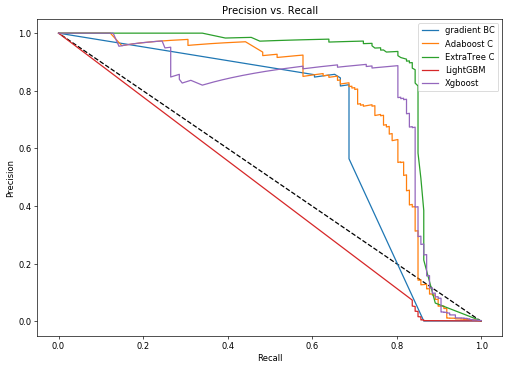

In [256]:
plt.figure(figsize=(10,7), dpi=60)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_gbc, precision_gbc, label='gradient BC')
plt.plot(recall_adb, precision_adb, label='Adaboost C')
plt.plot(recall_etc, precision_etc, label='ExtraTree C')
plt.plot(recall_lgbm, precision_lgbm, label='LightGBM')
plt.plot(recall_xgb, precision_xgb, label='Xgboost')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()